## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data

In [2]:
df=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/Courses/Data Science and Machine Learning/MLCourse/mammographic_masses.data.txt',na_values=['?'],names=['BI-RADS assessment','Age','Shape','Margin','Density','Severity'])
df.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
df.describe()  # the values in the variables are not even 

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


__The distribution of the data__

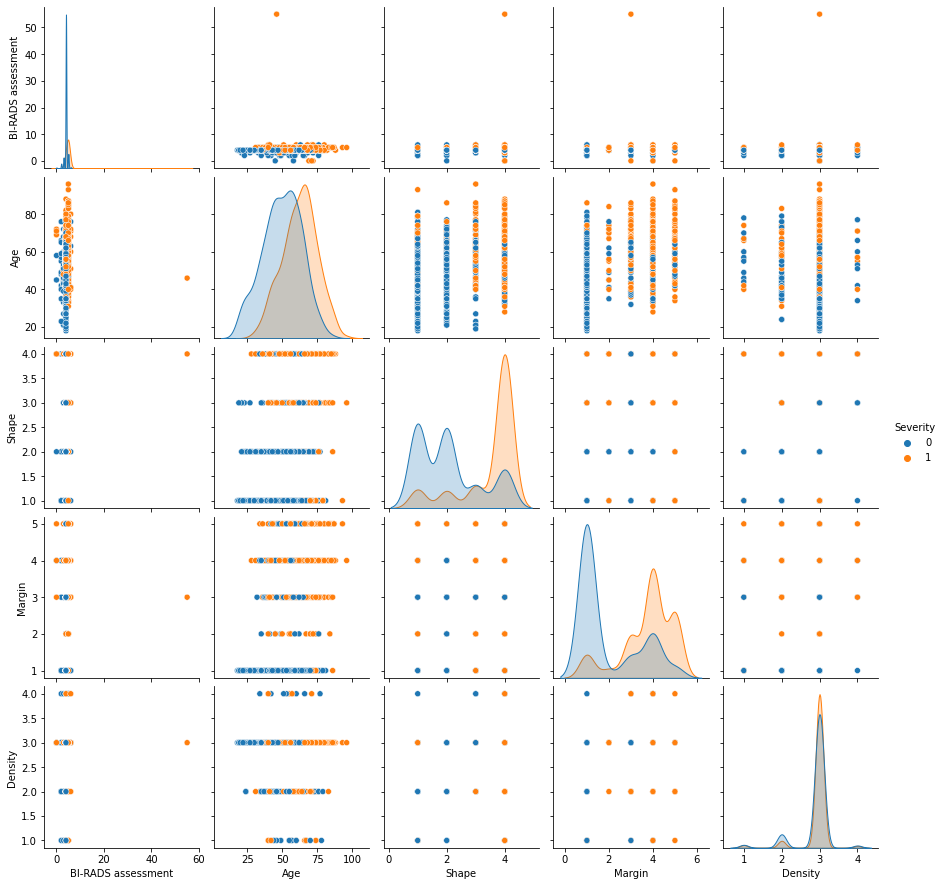

In [4]:
sns.pairplot(df,hue='Severity')       # there are some overlappings in the data

__Dropping the null values as this will not make the much of the difference__

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [7]:
df=df.sample(frac=1)  # shuffling the dataframe

__Checking the data balanced or not__

In [8]:
df['Severity'].value_counts()  # so the data is balanced 

0    427
1    403
Name: Severity, dtype: int64

In [9]:
feature_values=df.drop('Severity',axis=1)
labels_values=df['Severity']

## Standardaize the Variables

In [10]:
scale=StandardScaler()
feature_values_scaled=scale.fit_transform(feature_values)

In [11]:
feature_values_scaled

array([[ 0.3211177 ,  0.01487234, -0.62976801,  0.11923341,  0.24046607],
       [-0.20875843, -2.16750019, -1.43517241, -1.157718  ,  0.24046607],
       [-0.20875843,  0.15127063,  0.98104077,  1.39618483,  0.24046607],
       ...,
       [ 0.3211177 ,  0.62866462,  0.98104077,  1.39618483,  0.24046607],
       [-0.20875843, -1.6901062 , -0.62976801, -1.157718  ,  0.24046607],
       [ 0.3211177 ,  2.12904574,  0.98104077,  1.39618483,  0.24046607]])

## Train Test Split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(feature_values_scaled,labels_values,test_size=0.2,random_state=2)

## 1) KNN

In [13]:
model_knn=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

In [14]:
predict=model_knn.predict(X_test)

In [15]:
accuracy_score(y_test,predict)

0.7771084337349398

__Confusion Matrix__

In [16]:
confusion_matrix(y_test,predict)    # so we have to decrease the false postives and false negatives

array([[63, 18],
       [19, 66]])

__Picking the correct n neighbor value__

In [17]:
dict_accuracy=[]
for i in range(1,50):
    model_knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    predict=model_knn.predict(X_test)
    val=accuracy_score(y_test,predict)
    dict_accuracy.append(val)

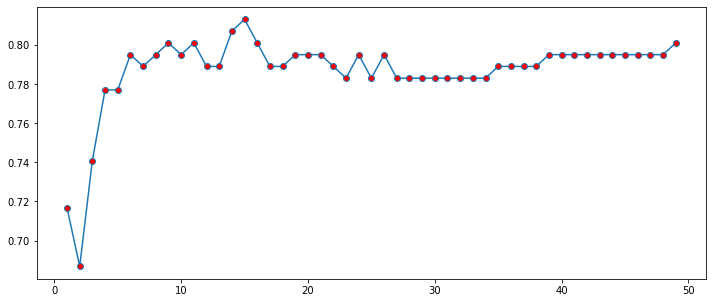

In [18]:
plt.figure(figsize=(12,5))
plt.plot(range(1,50),dict_accuracy,marker='o',markerfacecolor='red')
plt.show()

So after the n=10 we are getting the constant accuracy score

In [19]:
model_knn=KNeighborsClassifier(n_neighbors=12).fit(X_train,y_train)
predict=model_knn.predict(X_test)
accuracy_score(y_test,predict)

0.7891566265060241

In [20]:
confusion_matrix(y_test,predict)

array([[65, 16],
       [19, 66]])

__Overall accuracy of the model__

In [21]:
cross_knn=cross_val_score(model_knn,feature_values_scaled,labels_values,cv=10)
cross_knn.mean()

0.8108433734939758

## 2) Logistic Regression

In [22]:
model_logistic=LogisticRegression(random_state=2).fit(X_train,y_train)
model_logistic.score(X_test,y_test)

0.8192771084337349

__Overall accuracy of the model__

In [23]:
cross_logistic=cross_val_score(model_logistic,feature_values_scaled,labels_values,cv=10)
cross_logistic.mean()

0.8240963855421686

## 3) SVM

In [24]:
model_svm=svm.SVC(kernel='rbf',C=1).fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.8192771084337349

Now after the hyperparamer tuning the best kernel and the c value

__Overall accuracy of the model__

In [25]:
cross_svm=cross_val_score(model_svm,feature_values_scaled,labels_values,cv=10)
cross_svm.mean()

0.8265060240963855

## 4) Naive Bayes



For the naive bayes the values has to be normalized 

__Normalizing the variables__

In [26]:
scaler_minmax=MinMaxScaler()
feature_values_minmax=scaler_minmax.fit_transform(feature_values)

In [27]:
model_naive=MultinomialNB()

__Overall accuracy of the model__

In [28]:
cross_naive=cross_val_score(model_naive,feature_values,labels_values,cv=10)
cross_naive.mean()

0.7650602409638554

## 5) Decison Trees and Random Forest

In [29]:
model_decision=DecisionTreeClassifier(random_state=2).fit(X_train,y_train)

In [30]:
model_decision.score(X_test,y_test)

0.7469879518072289

In [31]:
cross_decison=cross_val_score(model_decision,feature_values_scaled,labels_values,cv=10)
cross_decison.mean()

0.7638554216867469

__Random Forest__

In [32]:
model_random=RandomForestClassifier(n_estimators=10,random_state=2).fit(X_train,y_train)

In [33]:
model_random.score(X_test,y_test)

0.7349397590361446

__Overall accuracy of the model__

In [34]:
cross_random=cross_val_score(model_random,feature_values_scaled,labels_values,cv=10)
cross_random.mean()

0.7867469879518072

## 6) XG Boost

The values in the XG Boost uses the DMatix so converting the data
into the form 

In [35]:
train=xgb.DMatrix(X_train,y_train)
test=xgb.DMatrix(X_test,y_test)

Setting the parameters and the epochs values

In [36]:
param={
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 2
}
epochs=10

After the hyperparameter tuning these are the best values

In [37]:
model_xgboost=xgb.train(param,train,epochs)

[10:41:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
predict=model_xgboost.predict(test)

In [39]:
accuracy_score(y_test,predict)

0.8072289156626506

__Confusion Matrix__

In [40]:
confusion_matrix(y_test,predict)

array([[69, 12],
       [20, 65]])

## So by applying all the Machine Learning algorithm we are getting the 

## Highest accuracy of 80-83% in the KNN , Logistic Regression and the SVM 